# <font color=#40bc7e> **Proteomics data Preprocessing and QC**
--------------

In [1]:
import sys
import os
#if i am working in the file "code"
sys.path.insert(0, '/home/labs/hornsteinlab/hadarkl/Hadar/primals/code')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold


%load_ext autoreload
%autoreload 2

from configs.constants import OUTPUTS_DIR, KERATIN,CLINICAL_DATA_REP,MAIN_DIR,PROTEIN_DATA_DIR,IMMUNE_PROTEINS,REPLICATION_INDEX
from utils.utils_protein_processing import low_variance_proteins, norm_log,identify_low_variance_and_high_correlation,drop_protein,handle_duplicate_columns,drop_unnecessary_columns,plot_combined_distributions,plot_nan_histogram

from loaders.proteomics import load_discovery_DIANN,load_replication_DIANN,discovery_replicat_together_DIANN


### 📎 <font color=#7cd3a8>Load DIANN  Data  
___

In [ ]:
discovery_imputed = pd.read_csv('/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/data/raw_data/proteins/DIANN/discovery/discovery_filled_corrected.csv')

### **Data 1:**
 - Discovery cohort was analysed separately through DIANN program
 - Replication cohort was analysed separately through DIANN program

In [4]:
discovery = load_discovery_DIANN()
replication = load_replication_DIANN()

In [10]:
print(f'Discovery shape : {discovery.shape}')
print(f'replication shape : {replication.shape}')


Discovery shape : (182, 2926)
replication shape : (181, 1681)


**Find the common columns between discovery and replication**

In [5]:
common_columns = replication.columns.intersection(discovery.columns)

# Select only the common columns and ensure the order is the same in both DataFrames
df_replication_common = replication[common_columns]
df_discovery_common = discovery[common_columns]

# Now both df have the same columns
print("Columns aligned successfully.")

print(f'Discovery shape : {df_discovery_common.shape}')
print(f'replication shape : {df_replication_common.shape}')



Columns aligned successfully.
Discovery shape : (182, 1536)
replication shape : (181, 1524)


### **Data 2:** In my current analysis I Decided to continue with this data :
- discovery & replication analysed together through DIANN program

In [2]:
data = discovery_replicat_together_DIANN(file_path='/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/data/raw_data/proteins/DIANN/rep_dis/protein_groups_DIA_NN_reporo2_cohorts.xlsx')
data

(363, 2866)


Genes,KIF5B,SERPINA1,IGKV3-7,IGLV4-69,IGLV8-61,IGLV4-60,IGLV10-54,IGLV5-48,IGLV7-46,IGLV5-37,...,BZW2,DYNC1LI1,SQOR,ROBO1,AP1M2,FCGBP,PCLO,COLEC10,APOA2,C1QA
sample number,,,,,,,,,,,,,,,,,,,,,
705,412884,NaN,93293648,286535,9922816,NaN,NaN,NaN,13632440,NaN,...,NaN,NaN,NaN,312981,NaN,78505000,13873927,17723880,210322,NaN
712,426618,5220307,68566952,634736,1968123,NaN,54808.30078,NaN,10612250,482132,...,NaN,NaN,NaN,4363999,NaN,92423800,20085624,15460770,2127483,709368
717,867667,6918856,147706800,676724,14056171,NaN,167479,171940,8419626,406632,...,NaN,NaN,NaN,273449,NaN,99430096,23467354,13977700,1798530,NaN
735,NaN,3822331,102561928,212108,2127053,NaN,93285.79688,115262,9609430,NaN,...,NaN,NaN,NaN,266378,NaN,96371600,12254295,13047970,728916,319105
746,553346,NaN,26271700,50468.89844,3753180,NaN,NaN,NaN,6281990,NaN,...,NaN,NaN,NaN,403567,NaN,76035504,8595228,19709460,465160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,NaN,NaN,222415392,753605,11209410,1031150,165858.9063,NaN,25253600,NaN,...,NaN,NaN,NaN,26749440,NaN,67396496,1682399,20489070,746686,4201754
1932,NaN,17418620,74073600,493219,2691190,NaN,NaN,NaN,15003620,NaN,...,NaN,NaN,NaN,42431500,NaN,74120496,2775101,20122370,479094,4276250
2053,271256,NaN,113614000,1564404,32393750,NaN,NaN,NaN,12167960,NaN,...,NaN,NaN,NaN,17360130,NaN,75393200,2774905,27948220,312819,4357280


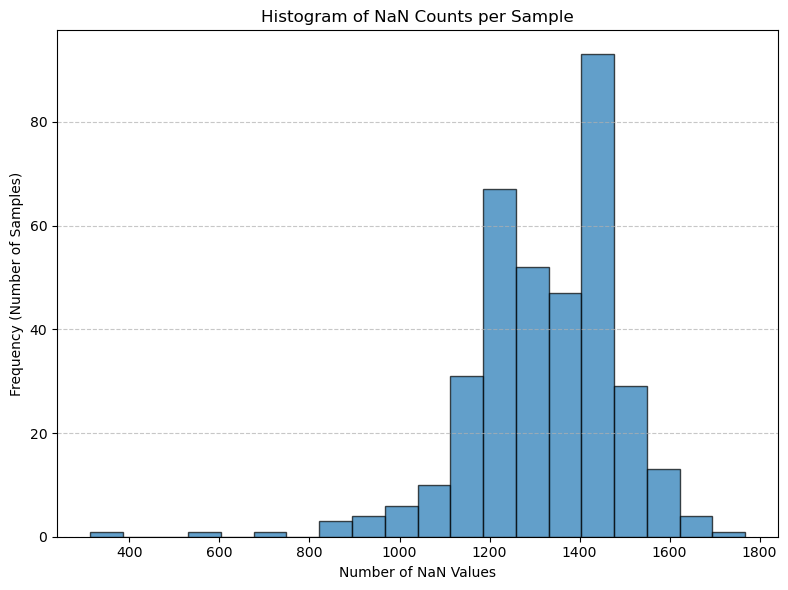

In [3]:
plot_nan_histogram(data)

### 📎 <font color=#7cd3a8>Preproccesing 
____

### **1.drop proteins:**
-  drop highly variability proteins
- drop unrecognized proteins
- proteins abundant in > 50% patients



In [4]:
data = drop_protein(data)
data

Shape after dropping immune proteins: (363, 2728)
Shape after dropping keratin: (363, 2639)
Shape after removing unrecognized column names: (363, 2809)
Shape after filtering proteins >50%: (363, 1459)


Genes,KIF5B,TPM3,TPM3,CHL1,CHL1,C1QB,C1QB,GSN,GSN,GSN,...,LYVE1,F11R,CPQ,EMILIN1,ROBO1,FCGBP,PCLO,COLEC10,C1QA,C1QA
sample number,,,,,,,,,,,,,,,,,,,,,
705,412884,380333,179936,9209280,17884250,1693060,1115236992,9770540,3828110,891809984,...,25362418,654485,5563900,130108.2031,312981,78505000,13873927,17723880,813383040,NaN
712,426618,958457,144868,14172027,20585660,NaN,825296000,9747130,4202430,998792000,...,25792548,950096,8021148,86431.5,4363999,92423800,20085624,15460770,569364672,709368
717,867667,390584,374252,17753600,22933690,NaN,1086270976,9847730,4688150,1103633920,...,34842272,396932,5402419,NaN,273449,99430096,23467354,13977700,661385024,NaN
735,NaN,1118444,149604,9568380,42830500,1568610,1031035968,8003310,3334930,836388992,...,45284632,561520,7984553,106039,266378,96371600,12254295,13047970,696182400,319105
746,553346,1094870,1239482.25,9980367,18324050,463809,1078423040,8087920,5266860,661943040,...,33911112,705710,5109730,28985,403567,76035504,8595228,19709460,703422784,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,NaN,NaN,NaN,6691390,18194990,1059174,2206998016,20447270,5177760,1504172032,...,38760200,NaN,6025850,NaN,26749440,67396496,1682399,20489070,1729116032,4201754
1932,NaN,943632,758049.875,3030120,18533500,772370,1858626048,13695050,2898180,1281428992,...,36479000,552058,4465650,NaN,42431500,74120496,2775101,20122370,1599579904,4276250
2053,271256,2373480,864839,4989980,18675760,535574,1862795008,15922030,5019972,1312028928,...,31360490,1289887,5183070,131124,17360130,75393200,2774905,27948220,1466755072,4357280


### **2.Imputed df(after filtering)**
- Python code that iterates through each column of a DataFrame, finds the minimum value in the column, and replaces any NaN values in that column with the found minimum value:


In [36]:
min_value = data[['KIF5B']].min().min() 
min_value

41985.89844

- you can look at sumple 2063 in KIF5B column that it fiill the nan value with the lowest value

In [6]:
df_imputed =pd.read_excel('/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/data/raw_data/proteins/DIANN/rep_dis/debugged_protein_data.xlsx').set_index('sample number')
df_imputed

,KIF5B,TPM3,TPM3.1,CHL1,CHL1.1,C1QB,C1QB.1,GSN,GSN.1,GSN.2,...,LYVE1,F11R,CPQ,EMILIN1,ROBO1,FCGBP,PCLO,COLEC10,C1QA.2,C1QA.3
sample number,,,,,,,,,,,,,,,,,,,,,
705,412884.00000,3.803330e+05,179936.000,9209280,17884250,1693060,1115236992,9770540,3828110,891809984,...,25362418,654485.0,5563900,130108.20310,312981.0,78505000,13873927.0,17723880,813383040,8.604860e+04
712,426618.00000,9.584570e+05,144868.000,14172027,20585660,377674,825296000,9747130,4202430,998792000,...,25792548,950096.0,8021148,86431.50000,4363999.0,92423800,20085624.0,15460770,569364672,7.093680e+05
717,867667.00000,3.905840e+05,374252.000,17753600,22933690,377674,1086270976,9847730,4688150,1103633920,...,34842272,396932.0,5402419,11180.90039,273449.0,99430096,23467354.0,13977700,661385024,8.604860e+04
735,41985.89844,1.118444e+06,149604.000,9568380,42830500,1568610,1031035968,8003310,3334930,836388992,...,45284632,561520.0,7984553,106039.00000,266378.0,96371600,12254295.0,13047970,696182400,3.191050e+05
746,553346.00000,1.094870e+06,1239482.250,9980367,18324050,463809,1078423040,8087920,5266860,661943040,...,33911112,705710.0,5109730,28985.00000,403567.0,76035504,8595228.0,19709460,703422784,8.604860e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,41985.89844,5.149310e+04,20266.500,6691390,18194990,1059174,2206998016,20447270,5177760,1504172032,...,38760200,116733.0,6025850,11180.90039,26749440.0,67396496,1682399.0,20489070,1729116032,4.201754e+06
1932,41985.89844,9.436320e+05,758049.875,3030120,18533500,772370,1858626048,13695050,2898180,1281428992,...,36479000,552058.0,4465650,11180.90039,42431500.0,74120496,2775101.0,20122370,1599579904,4.276250e+06
2053,271256.00000,2.373480e+06,864839.000,4989980,18675760,535574,1862795008,15922030,5019972,1312028928,...,31360490,1289887.0,5183070,131124.00000,17360130.0,75393200,2774905.0,27948220,1466755072,4.357280e+06


- Distribution before and after imputation

In [27]:
df_imputed.describe()

,KIF5B,TPM3,TPM3.1,CHL1,CHL1.1,C1QB,C1QB.1,GSN,GSN.1,GSN.2,...,LYVE1,F11R,CPQ,EMILIN1,ROBO1,FCGBP,PCLO,COLEC10,C1QA.2,C1QA.3
count,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,...,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02
mean,2.337638e+05,9.879396e+05,3.039174e+05,7.924263e+06,2.466806e+07,1.006630e+06,1.554266e+09,1.182773e+07,5.130961e+06,1.283269e+09,...,3.462045e+07,7.343225e+05,5.557463e+06,1.950594e+05,7.578554e+06,9.905168e+07,9.162671e+06,1.755494e+07,1.228917e+09,2.043233e+06
std,2.714315e+05,1.085173e+06,4.995658e+05,5.437931e+06,6.316689e+06,5.688853e+05,6.076741e+08,5.041104e+06,1.834657e+06,3.932941e+08,...,1.205857e+07,4.394166e+05,1.463372e+06,3.970945e+05,8.447969e+06,3.266046e+07,7.715093e+06,4.325143e+06,5.389788e+08,1.335012e+06
min,4.198590e+04,5.149310e+04,2.026650e+04,1.278180e+06,1.176197e+07,3.776740e+05,5.496393e+08,2.679490e+06,1.298720e+06,4.966414e+08,...,9.342861e+06,1.167330e+05,1.636790e+06,1.118090e+04,1.266270e+05,4.960020e+07,2.025970e+05,6.610060e+06,3.693220e+08,8.604860e+04
25%,4.198590e+04,5.149310e+04,9.183990e+04,4.432946e+06,2.035381e+07,3.776740e+05,9.861530e+08,7.941277e+06,3.757085e+06,9.946025e+08,...,2.563806e+07,3.632545e+05,4.573816e+06,1.118090e+04,2.826560e+05,7.675290e+07,3.055458e+06,1.440490e+07,7.208825e+08,1.090942e+06
50%,1.424270e+05,7.609480e+05,1.977336e+05,5.494980e+06,2.327563e+07,9.698870e+05,1.426602e+09,1.087428e+07,4.840090e+06,1.228524e+09,...,3.365051e+07,7.016490e+05,5.510980e+06,2.857150e+04,3.699090e+06,9.228400e+07,6.073906e+06,1.768256e+07,1.058193e+09,1.707966e+06
75%,3.246745e+05,1.327028e+06,3.739661e+05,9.652480e+06,2.760344e+07,1.437720e+06,2.105963e+09,1.549124e+07,6.469635e+06,1.530167e+09,...,4.090312e+07,9.802250e+05,6.479195e+06,2.028990e+05,1.310622e+07,1.130188e+08,1.446653e+07,2.046208e+07,1.733202e+09,2.810054e+06
max,1.902222e+06,9.883105e+06,7.666154e+06,3.431609e+07,5.848670e+07,2.973955e+06,2.879801e+09,2.760245e+07,1.081862e+07,2.569749e+09,...,9.175420e+07,2.834346e+06,1.010014e+07,3.081319e+06,4.243150e+07,3.209705e+08,3.743782e+07,3.929938e+07,2.339719e+09,6.836470e+06


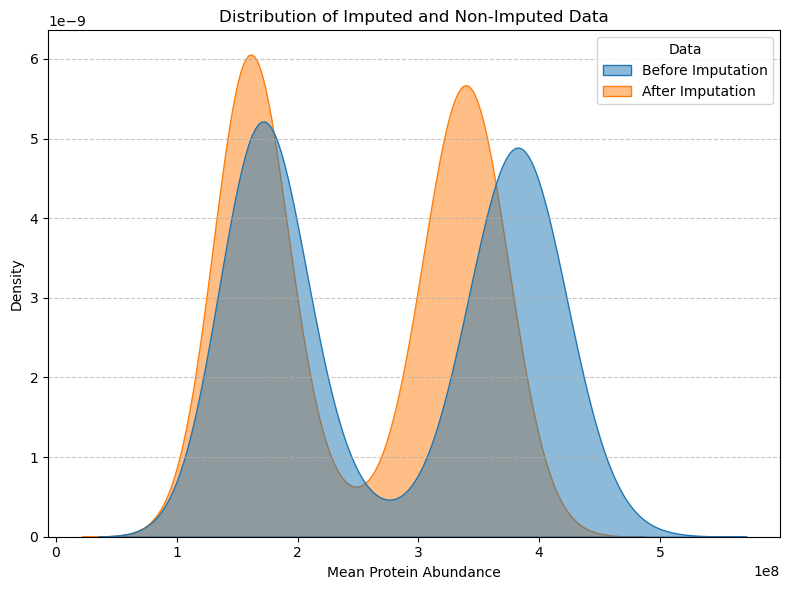

In [7]:
plot_combined_distributions(data,df_imputed)


### **2.log transormation:**

In [8]:
df_imputed = norm_log(df_imputed,apply_norm =False)
df_imputed

,KIF5B,TPM3,TPM3.1,CHL1,CHL1.1,C1QB,C1QB.1,GSN,GSN.1,GSN.2,...,LYVE1,F11R,CPQ,EMILIN1,ROBO1,FCGBP,PCLO,COLEC10,C1QA.2,C1QA.3
sample number,,,,,,,,,,,,,,,,,,,,,
705,18.655377,18.536904,17.457124,23.134657,24.092186,20.691202,30.054703,23.220007,21.868201,29.732161,...,24.596189,19.320001,22.407665,16.989352,18.255716,26.226281,23.725873,24.079191,29.599360,16.392864
712,18.702585,19.870354,17.144379,23.756543,24.295136,18.526782,29.620336,23.216546,22.002792,29.895609,...,24.620451,19.857714,22.935377,16.399270,22.057219,26.461761,24.259660,23.882109,29.084778,19.436175
717,19.726782,18.575273,18.513651,24.081608,24.450965,18.526782,30.016737,23.231360,22.160587,30.039615,...,25.054335,18.598532,22.365174,13.448749,18.060912,26.567179,24.484152,23.736624,29.300915,16.392864
735,15.357617,20.093062,17.190789,23.189843,25.352135,20.581055,29.941448,22.932165,21.669225,29.639599,...,25.432518,19.098978,22.928780,16.694235,18.023115,26.522105,23.546784,23.637322,29.374890,18.283672
746,19.077822,20.062328,20.241306,23.250661,24.127235,18.823171,30.006276,22.947337,22.328512,29.302132,...,25.015255,19.428716,22.284816,14.823019,18.622449,26.180170,23.035104,24.232385,29.389817,16.392864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,15.357617,15.652092,14.306809,22.673875,24.117038,20.014508,31.039438,24.285405,22.303897,30.486322,...,25.208073,16.832853,22.522733,13.448749,24.673005,26.006170,20.682088,24.288351,30.687388,22.002560
1932,15.357617,19.847865,19.531933,21.530943,24.143632,19.558933,30.791589,23.707151,21.466716,30.255106,...,25.120563,19.074460,22.090439,13.448749,25.338632,26.143369,21.404109,24.262297,30.575046,22.027915
2053,18.049296,21.178572,19.722072,22.250603,24.154664,19.030726,30.794822,23.924521,22.259248,30.289152,...,24.902445,20.298813,22.305375,17.000572,24.049274,26.167931,21.404007,24.736253,30.449981,22.054996


### **3.prepare Data to combat and add batch colomns:**

In [9]:
#Add the `batch` column
df_imputed['Batch'] = df_imputed.index.map(lambda idx: 'replication' if str(idx) in REPLICATION_INDEX else 'replication')
df_imputed

,KIF5B,TPM3,TPM3.1,CHL1,CHL1.1,C1QB,C1QB.1,GSN,GSN.1,GSN.2,...,F11R,CPQ,EMILIN1,ROBO1,FCGBP,PCLO,COLEC10,C1QA.2,C1QA.3,Batch
sample number,,,,,,,,,,,,,,,,,,,,,
705,18.655377,18.536904,17.457124,23.134657,24.092186,20.691202,30.054703,23.220007,21.868201,29.732161,...,19.320001,22.407665,16.989352,18.255716,26.226281,23.725873,24.079191,29.599360,16.392864,replication
712,18.702585,19.870354,17.144379,23.756543,24.295136,18.526782,29.620336,23.216546,22.002792,29.895609,...,19.857714,22.935377,16.399270,22.057219,26.461761,24.259660,23.882109,29.084778,19.436175,replication
717,19.726782,18.575273,18.513651,24.081608,24.450965,18.526782,30.016737,23.231360,22.160587,30.039615,...,18.598532,22.365174,13.448749,18.060912,26.567179,24.484152,23.736624,29.300915,16.392864,replication
735,15.357617,20.093062,17.190789,23.189843,25.352135,20.581055,29.941448,22.932165,21.669225,29.639599,...,19.098978,22.928780,16.694235,18.023115,26.522105,23.546784,23.637322,29.374890,18.283672,replication
746,19.077822,20.062328,20.241306,23.250661,24.127235,18.823171,30.006276,22.947337,22.328512,29.302132,...,19.428716,22.284816,14.823019,18.622449,26.180170,23.035104,24.232385,29.389817,16.392864,replication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,15.357617,15.652092,14.306809,22.673875,24.117038,20.014508,31.039438,24.285405,22.303897,30.486322,...,16.832853,22.522733,13.448749,24.673005,26.006170,20.682088,24.288351,30.687388,22.002560,replication
1932,15.357617,19.847865,19.531933,21.530943,24.143632,19.558933,30.791589,23.707151,21.466716,30.255106,...,19.074460,22.090439,13.448749,25.338632,26.143369,21.404109,24.262297,30.575046,22.027915,replication
2053,18.049296,21.178572,19.722072,22.250603,24.154664,19.030726,30.794822,23.924521,22.259248,30.289152,...,20.298813,22.305375,17.000572,24.049274,26.167931,21.404007,24.736253,30.449981,22.054996,replication


In [76]:
# saved as :data_log_to_combat.csv

### combat with R :

In [10]:
df_combat = pd.read_csv('/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/r_scripts/combat_log_corrected_data_new.csv')
df_combat = df_combat.rename(columns={'Unnamed: 0': 'sample_number'})
df_combat = df_combat.set_index('sample_number')

In [11]:
df_combat

,KIF5B,TPM3,TPM3.1,CHL1,CHL1.1,C1QB,C1QB.1,GSN,GSN.1,GSN.2,...,LYVE1,F11R,CPQ,EMILIN1,ROBO1,FCGBP,PCLO,COLEC10,C1QA.2,C1QA.3
sample_number,,,,,,,,,,,,,,,,,,,,,
705,18.912469,16.583786,17.817388,22.758578,24.033112,20.563469,30.569380,23.681038,22.211288,29.994159,...,24.912515,19.524917,22.529320,16.664179,20.391672,26.348248,22.667431,24.212831,30.190704,15.888558
712,18.970853,18.444034,17.499226,23.253802,24.236676,18.282463,30.140668,23.677666,22.349211,30.165093,...,24.934315,20.088069,22.997075,16.072010,23.822904,26.620953,23.188378,24.050844,29.681140,19.641295
717,20.237517,16.637314,18.892216,23.512660,24.392977,18.282463,30.531908,23.692101,22.510912,30.315695,...,25.324184,18.769317,22.491656,13.111055,20.215843,26.743036,23.407470,23.931265,29.895170,15.888558
735,14.834001,18.754724,17.546439,22.802525,25.296873,20.447390,30.457599,23.400553,22.007386,29.897357,...,25.664002,19.293438,22.991227,16.368019,20.181728,26.690836,22.492650,23.849646,29.968423,18.220132
746,19.434924,18.711849,20.649799,22.850956,24.068267,18.594817,30.521584,23.415337,22.682994,29.544433,...,25.289068,19.638776,22.420428,14.490185,20.722685,26.294848,21.993279,24.338746,29.983205,15.888558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,15.681371,17.307959,14.013893,23.241364,24.176418,20.163216,30.520946,23.825254,21.965376,30.213539,...,24.884600,16.753026,22.381555,13.788092,22.802292,25.933470,21.724139,24.147383,30.091543,21.473459
1932,15.681371,20.731588,19.144803,21.455889,24.202899,19.729769,30.270009,23.231321,21.148943,29.992119,...,24.784047,18.897064,21.872854,13.788092,23.561399,26.055519,22.464396,24.110867,29.978208,21.495248
2053,17.991154,21.817407,19.331513,22.580133,24.213883,19.227220,30.273282,23.454585,21.921833,30.024722,...,24.533417,20.068126,22.125780,17.322968,22.090965,26.077368,22.464291,24.775134,29.852038,21.518521


### **2.Average duplicat columns:**


In [12]:
df_combat = handle_duplicate_columns(df_combat)
df_combat


,A1BG,ABCA1,ABCE1,ABHD14B,ABI3BP,ACACA,ACAN,ACAT2,ACE,ACO1,...,ZG16,ZG16B,ZNF518A,ZNF534,ZNF550,ZNF639,ZNF705B.ZNF705D,ZNF728,ZNF839,ZYX
sample_number,,,,,,,,,,,,,,,,,,,,,
705,32.767019,14.617035,22.405854,15.767252,23.100818,27.276984,19.622691,17.587580,22.884085,19.206655,...,22.349299,19.261815,22.150588,22.544939,21.176072,24.098878,22.853966,20.079326,19.193004,20.008833
712,31.672679,16.129750,22.435973,15.985590,23.120916,24.807393,21.594033,19.656477,23.465324,18.663970,...,23.085535,23.143255,22.488943,21.583958,25.090641,23.752618,21.910224,18.013549,17.048372,20.984729
717,32.416262,20.135895,22.507210,15.628147,23.364433,25.521301,20.875044,14.841177,23.367109,19.634724,...,22.884191,17.605121,23.176669,22.205856,21.176072,23.815770,23.713183,20.161759,18.991899,18.837074
735,32.280831,14.617035,22.722695,15.262364,23.612653,25.866303,20.695015,19.855753,23.571384,18.991296,...,22.439549,17.632425,22.921454,22.046361,25.717360,23.668922,23.678001,19.979316,17.048372,19.772410
746,32.045909,14.617035,21.425236,16.801405,23.012890,26.479674,20.862343,19.665163,22.476821,21.279045,...,23.040817,17.516713,21.460545,21.432838,23.706523,24.052827,21.389616,18.013549,17.048372,21.086846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,32.136014,17.015121,22.412046,12.720938,23.556374,25.468611,20.581506,13.182273,23.020305,20.407781,...,21.760544,15.141392,23.040130,21.142707,25.893952,24.678790,20.484566,20.205246,14.810356,19.434697
1932,32.048399,17.015121,22.806363,16.511968,22.908193,24.237360,20.964760,13.182273,22.598951,19.070995,...,22.304507,19.538819,21.560668,22.554925,24.650367,25.432324,23.853604,20.570709,17.674666,23.214120
2053,31.308049,17.015121,22.266985,15.504587,23.160253,22.925214,20.461051,18.019536,23.034526,20.098971,...,23.034954,23.262529,22.979432,21.602526,26.410453,23.718491,20.484566,19.659673,14.810356,21.730581


### **5.drop proteins with low variance and hight correlation**

In [13]:
identify_low_variance_and_high_correlation(df_combat)

Proteins with variance below 0.05:
['ATRN', 'B3GNT2', 'C1RL', 'CFI', 'F13B', 'GC', 'HABP2', 'HSPA5', 'IGF2R', 'LRP1', 'MAN1A1', 'MINPP1', 'PLG', 'PROS1', 'QSOX1']
Pairs of proteins with Spearman correlation above 0.8:
   Protein_1 Protein_2  Correlation
0       ACTB     ACTA1     0.830383
1        CA1     BLVRB     0.845021
2        CA2     BLVRB     0.849584
3        CA2       CA1     0.861410
4        FGG       FGB     0.831981
5       FLNA     ACTN1     0.830107
6       FLNA    FERMT3     0.859114
7      GP1BB       CD9     0.840800
8      GP1BB      FLNA     0.800169
9        GP9    FERMT3     0.815660
10       GP9      FLNA     0.801445
11       HBB      HBA1     0.944065
12       HBD      HBA1     0.805170
13       HBD       HBB     0.845277
14       ILK    FERMT3     0.816784
15    ITGA2B       CD9     0.835505
16    ITGA2B    FERMT3     0.845030
17    ITGA2B      FLNA     0.828426
18    ITGA2B       ILK     0.825714
19     ITGB3    FERMT3     0.858332
20     ITGB3      FLNA    

(['ATRN',
  'B3GNT2',
  'C1RL',
  'CFI',
  'F13B',
  'GC',
  'HABP2',
  'HSPA5',
  'IGF2R',
  'LRP1',
  'MAN1A1',
  'MINPP1',
  'PLG',
  'PROS1',
  'QSOX1'],
    Protein_1 Protein_2  Correlation
 0       ACTB     ACTA1     0.830383
 1        CA1     BLVRB     0.845021
 2        CA2     BLVRB     0.849584
 3        CA2       CA1     0.861410
 4        FGG       FGB     0.831981
 5       FLNA     ACTN1     0.830107
 6       FLNA    FERMT3     0.859114
 7      GP1BB       CD9     0.840800
 8      GP1BB      FLNA     0.800169
 9        GP9    FERMT3     0.815660
 10       GP9      FLNA     0.801445
 11       HBB      HBA1     0.944065
 12       HBD      HBA1     0.805170
 13       HBD       HBB     0.845277
 14       ILK    FERMT3     0.816784
 15    ITGA2B       CD9     0.835505
 16    ITGA2B    FERMT3     0.845030
 17    ITGA2B      FLNA     0.828426
 18    ITGA2B       ILK     0.825714
 19     ITGB3    FERMT3     0.858332
 20     ITGB3      FLNA     0.839897
 21     ITGB3    ITGA2B     

In [14]:
# LOW_VAR = ['ATRN', 'B3GNT2', 'C1RL', 'CFI', 'F13B', 'GC', 'HABP2', 'HSPA5', 'IGF2R', 'LRP1', 'MAN1A1', 'MINPP1', 'PLG', 'PROS1', 'QSOX1']
# HIGH_CORR = ['TLN1','WDHD1','PLEK','ITGB3','ITGA2B','HBD','GP9','CA2','FLNA','BLVRB','JCHAIN','CPOX','PDS5B','JUP','FERMT3','FLNA']
DROP = ['MSLNL','ACTA1','S100A9','TLN1','WDHD1','PLEK','ITGB3','ITGA2B','HBD','GP9','CA2','FLNA','BLVRB','JCHAIN','CPOX','PDS5B','ATRN', 'B3GNT2', 'C1RL', 'CFI', 'F13B', 'GC', 'HABP2', 'HSPA5', 'IGF2R', 'LRP1', 'MAN1A1', 'MINPP1', 'PLG', 'PROS1', 'QSOX1','SLC4A1','GCC2','JUP','FERMT3','FLNA','FLNA ' ]

In [15]:
df_combat = drop_unnecessary_columns(df_combat,DROP)


In [16]:
df_combat

,A1BG,ABCA1,ABCE1,ABHD14B,ABI3BP,ACACA,ACAN,ACAT2,ACE,ACO1,...,ZG16,ZG16B,ZNF518A,ZNF534,ZNF550,ZNF639,ZNF705B.ZNF705D,ZNF728,ZNF839,ZYX
sample_number,,,,,,,,,,,,,,,,,,,,,
705,32.767019,14.617035,22.405854,15.767252,23.100818,27.276984,19.622691,17.587580,22.884085,19.206655,...,22.349299,19.261815,22.150588,22.544939,21.176072,24.098878,22.853966,20.079326,19.193004,20.008833
712,31.672679,16.129750,22.435973,15.985590,23.120916,24.807393,21.594033,19.656477,23.465324,18.663970,...,23.085535,23.143255,22.488943,21.583958,25.090641,23.752618,21.910224,18.013549,17.048372,20.984729
717,32.416262,20.135895,22.507210,15.628147,23.364433,25.521301,20.875044,14.841177,23.367109,19.634724,...,22.884191,17.605121,23.176669,22.205856,21.176072,23.815770,23.713183,20.161759,18.991899,18.837074
735,32.280831,14.617035,22.722695,15.262364,23.612653,25.866303,20.695015,19.855753,23.571384,18.991296,...,22.439549,17.632425,22.921454,22.046361,25.717360,23.668922,23.678001,19.979316,17.048372,19.772410
746,32.045909,14.617035,21.425236,16.801405,23.012890,26.479674,20.862343,19.665163,22.476821,21.279045,...,23.040817,17.516713,21.460545,21.432838,23.706523,24.052827,21.389616,18.013549,17.048372,21.086846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,32.136014,17.015121,22.412046,12.720938,23.556374,25.468611,20.581506,13.182273,23.020305,20.407781,...,21.760544,15.141392,23.040130,21.142707,25.893952,24.678790,20.484566,20.205246,14.810356,19.434697
1932,32.048399,17.015121,22.806363,16.511968,22.908193,24.237360,20.964760,13.182273,22.598951,19.070995,...,22.304507,19.538819,21.560668,22.554925,24.650367,25.432324,23.853604,20.570709,17.674666,23.214120
2053,31.308049,17.015121,22.266985,15.504587,23.160253,22.925214,20.461051,18.019536,23.034526,20.098971,...,23.034954,23.262529,22.979432,21.602526,26.410453,23.718491,20.484566,19.659673,14.810356,21.730581


### Check if specific protein exist in you data.

In [28]:

# Extract column names that start with 'IGLV'
iglv_columns = [col for col in data if col.startswith('Unnamed')]
print("Columns starting with 'Unnamed':", iglv_columns)


Columns starting with 'Unnamed': []



### 📎 <font color=#7cd3a8>Divide data to discovery and replication   
___

In [76]:
df_combat

,A1BG,ABCA1,ABCE1,ABHD14B,ABI3BP,ACACA,ACAN,ACAT2,ACE,ACO1,...,ZG16B,ZNF518A,ZNF534,ZNF550,ZNF639,ZNF705B.ZNF705D,ZNF728,ZNF839,ZYX,Batch
sample_number,,,,,,,,,,,,,,,,,,,,,
705,32.767019,14.617035,22.405854,15.767252,23.100818,27.276984,19.622691,17.587580,22.884085,19.206655,...,19.261815,22.150588,22.544939,21.176072,24.098878,22.853966,20.079326,19.193004,20.008833,replication
712,31.672679,16.129750,22.435973,15.985590,23.120916,24.807393,21.594033,19.656477,23.465324,18.663970,...,23.143255,22.488943,21.583958,25.090641,23.752618,21.910224,18.013549,17.048372,20.984729,replication
717,32.416262,20.135895,22.507210,15.628147,23.364433,25.521301,20.875044,14.841177,23.367109,19.634724,...,17.605121,23.176669,22.205856,21.176072,23.815770,23.713183,20.161759,18.991899,18.837074,replication
735,32.280831,14.617035,22.722695,15.262364,23.612653,25.866303,20.695015,19.855753,23.571384,18.991296,...,17.632425,22.921454,22.046361,25.717360,23.668922,23.678001,19.979316,17.048372,19.772410,replication
746,32.045909,14.617035,21.425236,16.801405,23.012890,26.479674,20.862343,19.665163,22.476821,21.279045,...,17.516713,21.460545,21.432838,23.706523,24.052827,21.389616,18.013549,17.048372,21.086846,replication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,32.136014,17.015121,22.412046,12.720938,23.556374,25.468611,20.581506,13.182273,23.020305,20.407781,...,15.141392,23.040130,21.142707,25.893952,24.678790,20.484566,20.205246,14.810356,19.434697,replication
1932,32.048399,17.015121,22.806363,16.511968,22.908193,24.237360,20.964760,13.182273,22.598951,19.070995,...,19.538819,21.560668,22.554925,24.650367,25.432324,23.853604,20.570709,17.674666,23.214120,replication
2053,31.308049,17.015121,22.266985,15.504587,23.160253,22.925214,20.461051,18.019536,23.034526,20.098971,...,23.262529,22.979432,21.602526,26.410453,23.718491,20.484566,19.659673,14.810356,21.730581,replication


In [17]:
# #Add the `batch` column
df_combat['Batch'] = df_combat.index.map(lambda idx: 'replication' if str(idx) in REPLICATION_INDEX else 'replication')

# Convert DISCOVERY_INDEX_BATCH1 elements to integers
REPLICATION_INDEX = list(map(int, REPLICATION_INDEX))

# Create discovery_harmonized DataFrame by filtering rows with indices in DISCOVERY_INDEX_BATCH1
replication = df_combat.loc[df_combat.index.isin(REPLICATION_INDEX)]

# Create replication_harmonized DataFrame by excluding rows in DISCOVERY_INDEX_BATCH1
discovery = df_combat.loc[~df_combat.index.isin(REPLICATION_INDEX)]

In [18]:

replication = replication.drop(columns=['Batch'])
discovery = discovery.drop(columns=['Batch'])

In [82]:
discovery.to_csv('log_before_combat_discovery_low_collinearity.csv', index=True)

In [83]:
discovery

,A1BG,ABCA1,ABCE1,ABHD14B,ABI3BP,ACACA,ACAN,ACAT2,ACE,ACO1,...,ZG16,ZG16B,ZNF518A,ZNF534,ZNF550,ZNF639,ZNF705B.ZNF705D,ZNF728,ZNF839,ZYX
sample_number,,,,,,,,,,,,,,,,,,,,,
711,32.459080,17.015121,23.159929,14.627908,23.570337,25.015745,22.101562,17.787973,22.870462,20.546500,...,23.382998,15.141392,21.663799,22.949272,23.598555,24.990916,23.267159,17.848860,17.129158,19.255654
743,32.305205,17.015121,23.127965,15.942541,23.631257,25.080328,21.353149,18.724461,23.720225,20.470663,...,22.415308,19.024457,22.361451,22.436854,25.065112,24.045357,22.790018,17.436486,18.800393,20.927512
744,32.323772,21.673171,23.423031,16.362781,23.206705,25.861563,21.295759,19.580121,23.053794,21.162831,...,22.750906,15.141392,21.595930,22.538899,24.255886,24.192975,23.732027,17.541730,18.486880,21.226167
747,32.142225,17.015121,23.306386,15.440992,23.427468,25.292285,20.694528,17.851310,23.438699,20.050952,...,23.654641,18.303900,21.440416,22.971375,23.266365,25.216788,22.064022,17.749950,18.277130,19.581688
749,32.424568,17.015121,23.580672,13.931568,23.564803,25.217729,21.421111,18.683962,23.054345,21.299404,...,23.815553,15.141392,22.044619,22.720446,24.660324,24.320203,21.744287,18.331105,16.938676,18.920264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,32.136014,17.015121,22.412046,12.720938,23.556374,25.468611,20.581506,13.182273,23.020305,20.407781,...,21.760544,15.141392,23.040130,21.142707,25.893952,24.678790,20.484566,20.205246,14.810356,19.434697
1932,32.048399,17.015121,22.806363,16.511968,22.908193,24.237360,20.964760,13.182273,22.598951,19.070995,...,22.304507,19.538819,21.560668,22.554925,24.650367,25.432324,23.853604,20.570709,17.674666,23.214120
2053,31.308049,17.015121,22.266985,15.504587,23.160253,22.925214,20.461051,18.019536,23.034526,20.098971,...,23.034954,23.262529,22.979432,21.602526,26.410453,23.718491,20.484566,19.659673,14.810356,21.730581


In [81]:
replication.to_csv('log_before_combat_replication_low_collinearity.csv', index=True)